In [2]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# import kaggle 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# import kaggle 



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pickle

with open("edges_df_sorted.pk1", "rb") as f:
    edges_df_sorted = pickle.load(f)

with open("edges_df.pk1", "rb") as f:
    edges_df = pickle.load(f)
    
with open("df_aggregated.pk1", "rb") as f:
    df_aggregated = pickle.load(f)




In [5]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,1
1,abdominal aortic aneurysm,abscess of the lung,1
2,abdominal aortic aneurysm,acute bronchiolitis,1
3,abdominal aortic aneurysm,acute bronchitis,1
4,abdominal aortic aneurysm,acute bronchospasm,1
...,...,...,...
66556,white blood cell disease,whooping cough,2
66557,white blood cell disease,wilson disease,1
66558,white blood cell disease,yeast infection,1
66559,whooping cough,wilson disease,1


In [6]:
#ignore, didn't know 'pain after an operation' would be a disease
disease_of_interest = "pain after an operation"

filtered_edges = edges_df[(edges_df["Disease1"] == disease_of_interest) | (edges_df["Disease2"] == disease_of_interest)]

print(filtered_edges)

                        Disease1                  Disease2  Weight
184    abdominal aortic aneurysm   pain after an operation       2
391             abdominal hernia   pain after an operation       2
602              abscess of nose   pain after an operation       1
1110      abscess of the pharynx   pain after an operation       2
1548                   achalasia   pain after an operation       1
...                          ...                       ...     ...
59615    pain after an operation                vulvodynia       5
59616    pain after an operation  white blood cell disease       3
59617    pain after an operation            whooping cough       1
59618    pain after an operation           yeast infection       1
59619    pain after an operation       zenker diverticulum       1

[390 rows x 3 columns]


In [7]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])

print("Nodes:", G.number_of_nodes())

print("Edges:", G.number_of_edges())
print("Network Density" , nx.density(G))
#Network density is 0.22, which is fairly low. 1.0 would be a fully connected graph
#There are some distinct cluters, some diseases share symptoms, and others are only connected to a few
#Some diseases have a specific symptom profile



KeyboardInterrupt: 

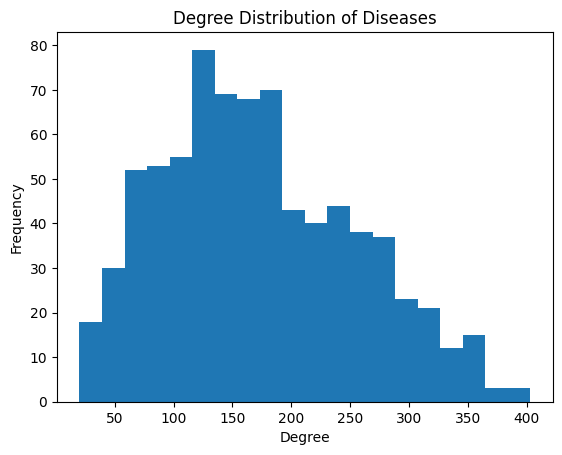

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=20)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Diseases")
plt.show()

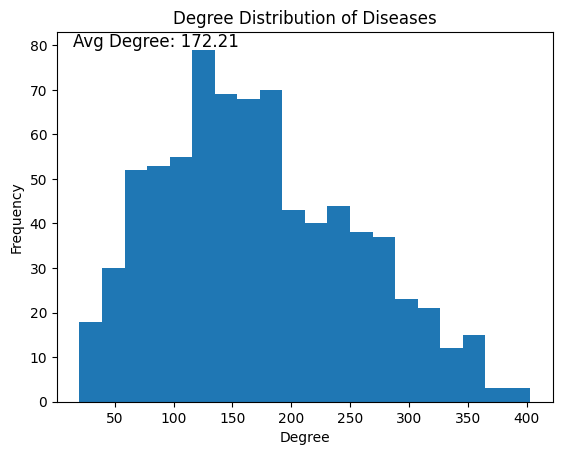

In [ ]:
average_degree = np.mean(degrees)

# Plot histogram
plt.hist(degrees, bins=20)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Diseases")

# Display average degree in the plot
plt.figtext(0.15, 0.85, f'Avg Degree: {average_degree:.2f}', fontsize=12)

plt.show()

# Basic Analysis

In [ ]:
# extracted from networkX cpsc 572 lecture winter 2025
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [ ]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  773
Number of edges:  66561

Average degree:  172.21474773609313
Average degree (alternate calculation) 172.21474773609313

Minimum degree:  20
Maximum degree:  403


## Plotting Degree Distribution

### Log-Log Plot

In [ ]:
# Get 10 logarithmically spaced bins between kmin and kmax
# buckets un from minimum degree to maximum degree
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

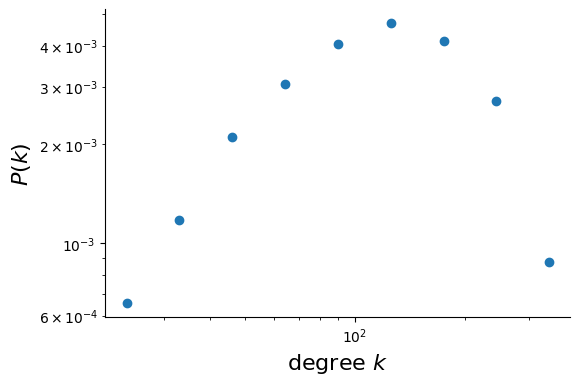

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Linear-Linear Plot

In [ ]:
# CODE BELOW TAKEN FROM CPSC 572 LECTURE ON NETWORKX (WINTER 2025)
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)  # number of bins (num=10) can be changed

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

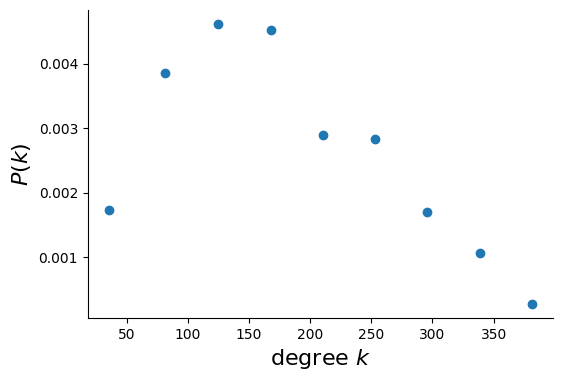

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [ ]:
print("Top 5 diseases by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#these diseases have the highest number of direct symptom based connections to other diseases

#Drug reaction:
    #high connectivity suggests drug-induced conditions are frequently misdiagnosed as other illnesses.
    
#Pain after an operation:
    #Post operation pain is common across many surgical procedures and may be mistaken for underlying infections or some other issues
    
#Shingles:
    #High centrality suggests it may often be confused with other viral infections or autoimmune conditions.
    
#Acute Stress Reaction:
    #indicates stress-related symptoms might contribute to misdiagnosis of physical diseases.
    



Top 5 diseases by Degree Centrality: [('hypokalemia', 0.522020725388601), ('drug reaction', 0.5077720207253886), ('pain after an operation', 0.5051813471502591), ('shingles (herpes zoster)', 0.49093264248704666), ('acute stress reaction', 0.48704663212435234)]


In [ ]:
print("Top 5 diseases by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

#Shingles:
    #Shingles has symptoms (nerve pain, rashes, fever) that overlap with both viral infections and autoimmune conditions.
    #This suggests shingles acts as a key diagnostic confusion point, potentially being mistaken for other neurological, dermatological, or viral illnesses.
    
#Parasitic disease:
    #Many parasitic diseases have vague symptoms (abdominal pain, diarrhea, fatigue), which means they might connect conditions like food poisoning, viral infections, and malabsorption disorders.
    
#Drug Reaction:
    #High betweenness suggests that drug reactions bridge multiple medical conditions, leading to frequent confusion with infections, allergies, or autoimmune issues.
    
#These diseases connect different clusters, making them major misdiagnosis risks.
#Doctors should carefully differentiate these from diseases in both of their clusters.



Top 5 diseases by Betweenness Centrality: [('shingles (herpes zoster)', 0.008302474423198791), ('lyme disease', 0.006565076328624316), ('parasitic disease', 0.005502711106188218), ('lymphadenitis', 0.005303623907557194), ('drug reaction', 0.005164641297152865)]


In [ ]:
print("Top 5 diseases by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#These diseases are highly reachable in the network, meaning they are common misdiagnosis or differential diagnosis candidates.
#Doctors should always consider these diseases in diagnostic decisions since they connect to many symptomatically similar conditions.
#These diseases may be important in machine learning models for automated diagnosis, as they likely appear as early-stage possibilities in differential diagnoses.



Top 5 diseases by Closeness Centrality: [('hypokalemia', 0.6765994741454864), ('drug reaction', 0.6701388888888888), ('pain after an operation', 0.6689774696707106), ('shingles (herpes zoster)', 0.6626609442060086), ('acute stress reaction', 0.660958904109589)]


In [ ]:
print("Top 5 diseases by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


#Since it is so interconnected, doctors should always consider checking for underlying causes of hypokalemia, as it may be a secondary symptom of another major condition.

#understanding postoperative symptom patterns could help reduce unnecessary tests and avoid confusion with unrelated conditions.

#These diseases act as key “hubs” in the network, influencing diagnosis patterns across multiple categories.
#Diseases with high eigenvector centrality may serve as key “signals” in differential diagnosis algorithms.
#Misdiagnosis risks are high when these diseases are confused with others that have similar symptoms but different underlying causes.

Top 5 diseases by Eigenvector Centrality: [('hypokalemia', 0.0820095696120754), ('pain after an operation', 0.07735926826671709), ('gastritis', 0.07639006170018714), ('drug reaction', 0.07499439055255328), ('acute kidney injury', 0.07408833976707527)]


# Null Model 


In [ ]:
# calculate clustering coefficient and shortest path on our real data
C = np.mean(list(nx.clustering(G).values()))
d = nx.average_shortest_path_length(G,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.5847346984108563
Average Shortest Path:  1.7916870546756127


# Disease Symptom Graph


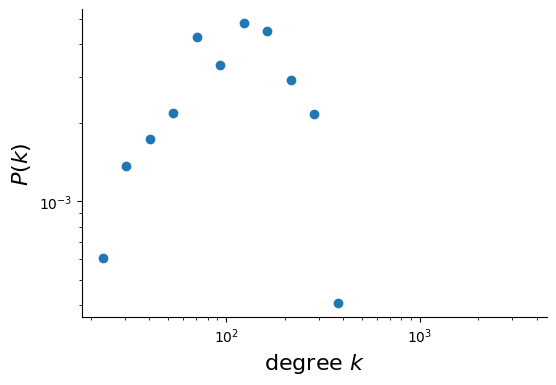

In [ ]:
 
degrees = [G.degree(n) for n in G.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Erdös-Renyi Graph


In [ ]:
GN = len(G.nodes()) # G.number_of_nodes()
# make sure same nuber of linkes 
max_L = GN*(GN-1)/2 
actual_L = len(G.edges()) 
p = actual_L/max_L 

# generate an ER graph with comparable N and average k
ER = nx.erdos_renyi_graph(GN, p, directed=False)



Plotting Degree Distribution Graph with Erdos Renyi model


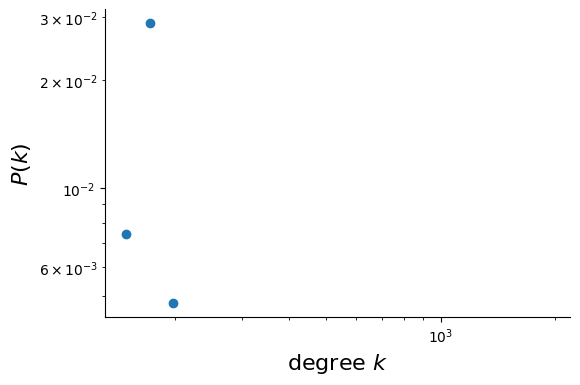

In [ ]:
# plot degree distribution (P(k) vs k graph) for our ER graph
degrees = [ER.degree(n) for n in ER.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()



In [ ]:
# extracted from networkX cpsc 572 lecture winter 2025

clustering_ER = []
shortest_path_ER = []

# generate an ensemble of 100 random graphs

# we want to create 100 graphs here, each time it goes through the loop it will create ER graph

for i in range(1000): 
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    #calculate clustering
    C_ER = np.mean(list(nx.clustering(ER).values()))
    # check if graph is connected (when creating ER graph, not guaranteed to be connected, 
    # could exist in multiple components. if exist like that then avg shortest path length is not defined)
    if nx.is_connected(ER)==True:
        # calculate path length
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    shortest_path_ER.append(d_ER)
    
# calculate mean and standard deviation of clustering
print(np.mean(clustering_ER))
print(np.std(clustering_ER ))
# calculate mean and standard deviation of shortest path
print(np.mean(shortest_path_ER))
print(np.std(shortest_path_ER))

0.22310416176039216
0.0007486401739656695
1.776911511572569
0.0007347433320408131


Plotting the results from Clustering and Shortest Path and comparing it with our Real Data



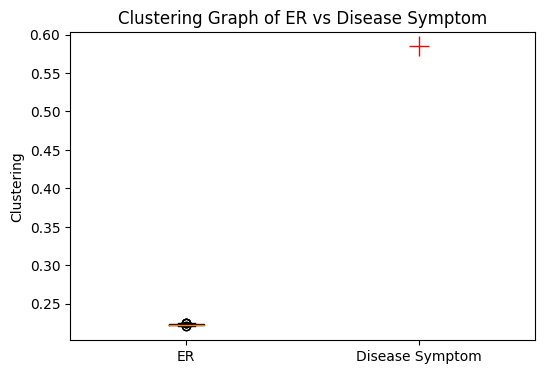

In [ ]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# it create a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Clustering Graph of ER vs Disease Symptom')
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()


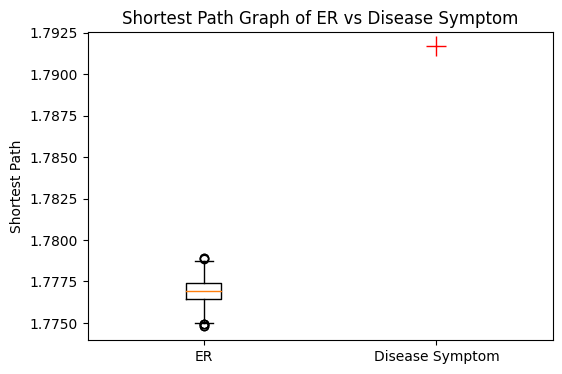

In [ ]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# createe a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(shortest_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Shortest Path Graph of ER vs Disease Symptom')
plt.ylabel('Shortest Path')
plt.xlim([0.5,2.5])
plt.show()

# Degree Preservation Graph



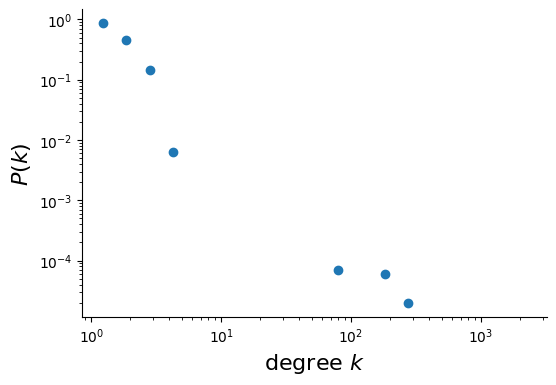

In [10]:
# create a copy of the graph 
DP = G.copy()
nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=10000000)

#  plot degree distribution graph for our DP graph 
degrees = [DP.degree(n) for n in DP.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [11]:
# extracted from networkX cpsc 572 lecture winter 2025

clustering_DP = []
shortest_path_DP = []

# generate an ensemble of 1000 random graphs
for i in range(1000): # 1000 is better
    # shuffle graph , use DP not the original graph or we will destroy data
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=10000000)
    # calculate mean of clustering
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True: # could also enforce connectivity, or run loop until we have 100 values
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    shortest_path_DP.append(d_DP)
    
# calculate mean and standard deviation of clustering
print(np.mean(clustering_DP))
print(np.std(clustering_DP))
# calculate mean and standard deviation of shortest path
print(np.mean(shortest_path_DP))
print(np.std(shortest_path_DP))

0.5379146939339015
0.0058308430614572885
2.3121362339738565
0.003916975869923315


Plotting the results from Clustering and Shortest Path and comparing it with our Real Data



NameError: name 'C' is not defined

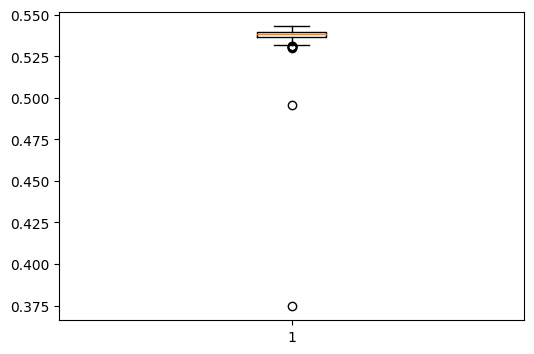

In [23]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering DP 
# it create a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(clustering_DP)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['DP','Disease Symptom'])
plt.title('Clustering Graph of DP vs Disease Symptom')
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()



NameError: name 'd' is not defined

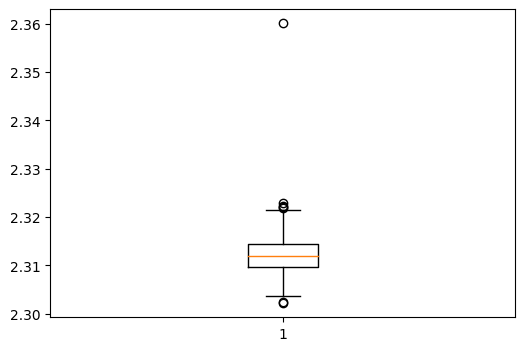

In [24]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# createe a boxplot of distribution of clustering across the ensemble of DP networks
plt.boxplot(shortest_path_DP)
plt.plot(2,d,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['DP','Disease Symptom'])
plt.title('Shortest Path Graph of DP vs Disease Symptom')
plt.ylabel('Shortest Path')
plt.xlim([0.5,3.5])
plt.show()

# Comparing ER, DP, and Disease Symptom Graph


In [17]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Disease Symptom'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

fig = plt.figure(figsize=(6,4))

plt.boxplot([shortest_path_ER,shortest_path_DP], positions=[1,2])
plt.plot(3,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Disease Symptom'])
plt.ylabel('Average Shortest Path')
plt.xlim([0.5,3.5])
plt.show()

NameError: name 'clustering_ER' is not defined

<Figure size 600x400 with 0 Axes>